In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''
The first command sets the maximum number of columns to display in a pandas DataFrame to be unlimited,
which is useful when dealing with large datasets.

The second command sets the default size of figures in Seaborn, a popular visualization library in Python,
to be 11 inches in width and 4 inches in height. This can be adjusted to suit the user's preference or
specific visualization needs.
'''
pd.options.display.max_columns = None
sns.set(rc={'figure.figsize':(11,4)}) # for plot

In [3]:
metadata = pd.read_excel("dataset.xls")
metadata.head()

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,Living with a partner/child,Parental home,Having only one parent,At least one parent unemployed,Siblings,Long commute,Mode of transportation,Financial difficulties,Grant,Additional income,Public health insurance,Private health insurance,C.M.U.,Irregular rhythm of meals,Unbalanced meals,Eating junk food,On a diet,Irregular rhythm or unbalanced meals,Physical activity(3 levels),Physical activity(2 levels),Weight (kg),Height (cm),Overweight and obesity,Systolic blood pressure (mmHg),Diastolic blood pressure (mmHg),Prehypertension or hypertension,Heart rate (bpm),Abnormal heart rate,Distant visual acuity of right eye (score /10),Distant visual acuity of left eye (score /10),Close visual acuity of right eye (score /10),Close visual acuity of left eye (score /10),Decreased in distant visual acuity,Decreased in close visual acuity,Urinalysis (glycosuria),Urinalysis (proteinuria),Urinalysis (hematuria),Urinalysis leukocyturia),Urinalysis (positive nitrite test),Abnormal urinalysis,Vaccination up to date,Control examination needed,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,no,no,no,no,yes,no,on foot,no,yes,no,yes,no,no,yes,no,yes,no,yes,regularly,regularly,62.0,165.0,no,NaN,6.0,NaN,75.0,no,10,10,10,10,no,no,no,no,no,yes,no,yes,NaN,yes,no,no,no,no,no,no,no or occasionally,no,no,no
1,19,female,yes,humanities,second,no,no,yes,yes,yes,no,yes,no,no,no,yes,by public transportation,no,yes,no,yes,yes,no,no,no,yes,no,no,regularly,regularly,57.0,170.0,no,10.0,5.0,no,65.0,no,10,10,10,10,no,no,no,no,yes,yes,no,yes,NaN,no,no,no,no,regularly,occasionally to regularly,occasionally,no or occasionally,no,no,no
2,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,no,no,yes,no,yes,no,by car,no,yes,yes,yes,yes,no,yes,no,yes,no,yes,no,no activity or occasionally,NaN,162.0,NaN,11.0,7.0,no,65.0,no,10,10,10,10,no,no,no,no,no,no,no,no,NaN,no,no,no,yes,no,no,occasionally,no or occasionally,no,no,no
3,19,female,yes,humanities,second,no,no,yes,yes,yes,no,no,no,no,no,no,on foot,no,yes,no,yes,yes,no,no,no,yes,no,no,no,no activity or occasionally,85.0,193.0,no,11.0,8.0,no,70.0,no,10,10,10,10,no,no,no,no,no,yes,no,yes,NaN,no,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4,18,female,yes,humanities,second,no,no,yes,yes,yes,no,no,no,no,yes,no,on foot,no,yes,no,yes,yes,no,no,no,yes,no,no,no,no activity or occasionally,41.0,161.0,no,10.0,6.0,no,NaN,NaN,10,10,10,10,no,no,no,no,yes,no,no,yes,yes,no,no,no,no,no,no,no,no or occasionally,no,no,no


In [4]:
# Identify categorical and numerical columns
categorical_columns = []
numerical_columns = []

for column in metadata.columns:
    if metadata[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

# Fill missing values with mode for categorical columns
metadata[categorical_columns] = metadata[categorical_columns].fillna(metadata[categorical_columns].mode().iloc[0])

# Fill missing values with mean for numerical columns
metadata[numerical_columns] = metadata[numerical_columns].fillna(metadata[numerical_columns].mean())


In [5]:
metadata

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,Living with a partner/child,Parental home,Having only one parent,At least one parent unemployed,Siblings,Long commute,Mode of transportation,Financial difficulties,Grant,Additional income,Public health insurance,Private health insurance,C.M.U.,Irregular rhythm of meals,Unbalanced meals,Eating junk food,On a diet,Irregular rhythm or unbalanced meals,Physical activity(3 levels),Physical activity(2 levels),Weight (kg),Height (cm),Overweight and obesity,Systolic blood pressure (mmHg),Diastolic blood pressure (mmHg),Prehypertension or hypertension,Heart rate (bpm),Abnormal heart rate,Distant visual acuity of right eye (score /10),Distant visual acuity of left eye (score /10),Close visual acuity of right eye (score /10),Close visual acuity of left eye (score /10),Decreased in distant visual acuity,Decreased in close visual acuity,Urinalysis (glycosuria),Urinalysis (proteinuria),Urinalysis (hematuria),Urinalysis leukocyturia),Urinalysis (positive nitrite test),Abnormal urinalysis,Vaccination up to date,Control examination needed,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,no,no,no,no,yes,no,on foot,no,yes,no,yes,no,no,yes,no,yes,no,yes,regularly,regularly,62.000000,165.0,no,11.368206,6.00000,no,75.000000,no,10,10,10,10,no,no,no,no,no,yes,no,yes,yes,yes,no,no,no,no,no,no,no or occasionally,no,no,no
1,19,female,yes,humanities,second,no,no,yes,yes,yes,no,yes,no,no,no,yes,by public transportation,no,yes,no,yes,yes,no,no,no,yes,no,no,regularly,regularly,57.000000,170.0,no,10.000000,5.00000,no,65.000000,no,10,10,10,10,no,no,no,no,yes,yes,no,yes,yes,no,no,no,no,regularly,occasionally to regularly,occasionally,no or occasionally,no,no,no
2,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,no,no,yes,no,yes,no,by car,no,yes,yes,yes,yes,no,yes,no,yes,no,yes,no,no activity or occasionally,64.105158,162.0,no,11.000000,7.00000,no,65.000000,no,10,10,10,10,no,no,no,no,no,no,no,no,yes,no,no,no,yes,no,no,occasionally,no or occasionally,no,no,no
3,19,female,yes,humanities,second,no,no,yes,yes,yes,no,no,no,no,no,no,on foot,no,yes,no,yes,yes,no,no,no,yes,no,no,no,no activity or occasionally,85.000000,193.0,no,11.000000,8.00000,no,70.000000,no,10,10,10,10,no,no,no,no,no,yes,no,yes,yes,no,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4,18,female,yes,humanities,second,no,no,yes,yes,yes,no,no,no,no,yes,no,on foot,no,yes,no,yes,yes,no,no,no,yes,no,no,no,no activity or occasionally,41.000000,161.0,no,10.000000,6.00000,no,73.649552,no,10,10,10,10,no,no,no,no,yes,no,no,yes,yes,no,no,no,no,no,no,no,no or occasionally,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,19,male,yes,humanities,first,no,no,yes,yes,yes,no,yes,yes,no,yes,yes,by public transportation,no,no,no,no,no,no,yes,yes,yes,no,yes,no,no activity or occasionally,68.000000,181.0,no,12.000000,8.00000,no,68.000000,no,10,10,10,10,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4180,18,male,yes,humanities,first,no,no,no,yes,yes,no,yes,yes,yes,no,yes,by public transportation,no,yes,no,yes,yes,no,no,no,yes,no,no,no,no activity or occasionally,64.000000,180.0,no,12.000000,8.00000,no,80.000000,no,10,10,10,10,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no or occasionally,no,no,no
4181,19,female,yes,humanities,first,no,no,yes,yes,yes,no,yes,yes,no,yes,no,by public transportation,no,no,no,no,no,no,no,no,no,no,

In [6]:
metadata['Age (4 levels)'] = metadata['Age (4 levels)'].astype(str)

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Identify object (categorical) columns
object_columns = metadata.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to object columns
for column in object_columns:
    metadata[column] = label_encoder.fit_transform(metadata[column])

# The object (categorical) columns in the DataFrame are now label encoded


In [8]:
metadata

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,Living with a partner/child,Parental home,Having only one parent,At least one parent unemployed,Siblings,Long commute,Mode of transportation,Financial difficulties,Grant,Additional income,Public health insurance,Private health insurance,C.M.U.,Irregular rhythm of meals,Unbalanced meals,Eating junk food,On a diet,Irregular rhythm or unbalanced meals,Physical activity(3 levels),Physical activity(2 levels),Weight (kg),Height (cm),Overweight and obesity,Systolic blood pressure (mmHg),Diastolic blood pressure (mmHg),Prehypertension or hypertension,Heart rate (bpm),Abnormal heart rate,Distant visual acuity of right eye (score /10),Distant visual acuity of left eye (score /10),Close visual acuity of right eye (score /10),Close visual acuity of left eye (score /10),Decreased in distant visual acuity,Decreased in close visual acuity,Urinalysis (glycosuria),Urinalysis (proteinuria),Urinalysis (hematuria),Urinalysis leukocyturia),Urinalysis (positive nitrite test),Abnormal urinalysis,Vaccination up to date,Control examination needed,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,2,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,1,0,1,0,0,1,0,1,0,1,2,1,62.000000,165.0,0,11.368206,6.00000,0,75.000000,0,10,10,10,10,0,0,0,0,0,1,0,1,1,1,0,0,0,2,1,0,0,0,0,0
1,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,2,1,57.000000,170.0,0,10.000000,5.00000,0,65.000000,0,10,10,10,10,0,0,0,0,1,1,0,1,1,0,0,0,0,4,2,1,0,0,0,0
2,2,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,64.105158,162.0,0,11.000000,7.00000,0,65.000000,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,0,0,1,2,1,1,0,0,0,0
3,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,2,0,1,0,1,1,0,0,0,1,0,0,0,0,85.000000,193.0,0,11.000000,8.00000,0,70.000000,0,10,10,10,10,0,0,0,0,0,1,0,1,1,0,0,0,0,2,1,1,0,0,0,0
4,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,1,0,1,1,0,0,0,1,0,0,0,0,41.000000,161.0,0,10.000000,6.00000,0,73.649552,0,10,10,10,10,0,0,0,0,1,0,0,1,1,0,0,0,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,1,1,1,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,68.000000,181.0,0,12.000000,8.00000,0,68.000000,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,1,0,0,0,0
4180,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,64.000000,180.0,0,12.000000,8.00000,0,80.000000,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0
4181,1,0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,57.000000,168.0,0,12.000000,7.00000,0,70.000000,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,1,0,0,0,0
4182,2,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,2,1,47.000000,173.0,0,11.000000,6.74603,0,81.000000,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,1,0,0,1,0


# Feature Forming

For BMI: bmi = weight/height*height

for Mean Arterial Pressure: MAP = DP + 0.412 (SP - DP)
DP = Dystolic Pressure
SP = Systolic Pressure

For Pulse Pressure: PP = SP - DP

In [9]:
'''
Create new df for features which includes 3 features measured from processed features as in paper
'''

features = pd.DataFrame()

features['BMI'] = metadata['Weight (kg)'] / (metadata['Height (cm)'] *  0.01 * 2)

features['MAP'] = metadata['Diastolic blood pressure (mmHg)'] + \
    (0.412 *(metadata['Systolic blood pressure (mmHg)'] - metadata['Diastolic blood pressure (mmHg)']) * \
     metadata['Diastolic blood pressure (mmHg)'] )

features['PP'] = metadata['Systolic blood pressure (mmHg)'] - metadata['Diastolic blood pressure (mmHg)']
features.head()

,BMI,MAP,PP
0,18.787879,19.270205,5.368206
1,16.764706,15.300000,5.000000
2,19.785543,18.536000,4.000000
3,22.020725,17.888000,3.000000
4,12.732919,15.888000,4.000000


In [10]:
# merge all features together
features = features.join(metadata)
features = features.drop(labels=['Weight (kg)',
                                 'Height (cm)',
                                 'Systolic blood pressure (mmHg)',
                                 'Diastolic blood pressure (mmHg)'],axis=1)
features.head()

,BMI,MAP,PP,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,Living with a partner/child,Parental home,Having only one parent,At least one parent unemployed,Siblings,Long commute,Mode of transportation,Financial difficulties,Grant,Additional income,Public health insurance,Private health insurance,C.M.U.,Irregular rhythm of meals,Unbalanced meals,Eating junk food,On a diet,Irregular rhythm or unbalanced meals,Physical activity(3 levels),Physical activity(2 levels),Overweight and obesity,Prehypertension or hypertension,Heart rate (bpm),Abnormal heart rate,Distant visual acuity of right eye (score /10),Distant visual acuity of left eye (score /10),Close visual acuity of right eye (score /10),Close visual acuity of left eye (score /10),Decreased in distant visual acuity,Decreased in close visual acuity,Urinalysis (glycosuria),Urinalysis (proteinuria),Urinalysis (hematuria),Urinalysis leukocyturia),Urinalysis (positive nitrite test),Abnormal urinalysis,Vaccination up to date,Control examination needed,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,18.787879,19.270205,5.368206,2,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,1,0,1,0,0,1,0,1,0,1,2,1,0,0,75.000000,0,10,10,10,10,0,0,0,0,0,1,0,1,1,1,0,0,0,2,1,0,0,0,0,0
1,16.764706,15.300000,5.000000,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,2,1,0,0,65.000000,0,10,10,10,10,0,0,0,0,1,1,0,1,1,0,0,0,0,4,2,1,0,0,0,0
2,19.785543,18.536000,4.000000,2,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,65.000000,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,0,0,1,2,1,1,0,0,0,0
3,22.020725,17.888000,3.000000,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,2,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,70.000000,0,10,10,10,10,0,0,0,0,0,1,0,1,1,0,0,0,0,2,1,1,0,0,0,0
4,12.732919,15.888000,4.000000,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,73.649552,0,10,10,10,10,0,0,0,0,1,0,0,1,1,0,0,0,0,2,1,0,0,0,0,0


### Normalization

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Specify the columns to be normalized
columns_to_normalize = ['BMI', 'MAP', 'PP', 'Heart rate (bpm)']

# Create a new dataframe with the selected columns
X = features.copy()[columns_to_normalize]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

# Add the remaining non-normalized columns to the new dataframe
remaining_columns = features.drop(columns=columns_to_normalize)
X1 = pd.concat([X, remaining_columns], axis=1)

# The dataframe X now contains the min-max normalized columns along with the other features


In [12]:
X1

,BMI,MAP,PP,Heart rate (bpm),Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,Living with a partner/child,Parental home,Having only one parent,At least one parent unemployed,Siblings,Long commute,Mode of transportation,Financial difficulties,Grant,Additional income,Public health insurance,Private health insurance,C.M.U.,Irregular rhythm of meals,Unbalanced meals,Eating junk food,On a diet,Irregular rhythm or unbalanced meals,Physical activity(3 levels),Physical activity(2 levels),Overweight and obesity,Prehypertension or hypertension,Abnormal heart rate,Distant visual acuity of right eye (score /10),Distant visual acuity of left eye (score /10),Close visual acuity of right eye (score /10),Close visual acuity of left eye (score /10),Decreased in distant visual acuity,Decreased in close visual acuity,Urinalysis (glycosuria),Urinalysis (proteinuria),Urinalysis (hematuria),Urinalysis leukocyturia),Urinalysis (positive nitrite test),Abnormal urinalysis,Vaccination up to date,Control examination needed,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,0.256726,0.352963,0.505778,0.416667,2,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,1,0,1,0,0,1,0,1,0,1,2,1,0,0,0,10,10,10,10,0,0,0,0,0,1,0,1,1,1,0,0,0,2,1,0,0,0,0,0
1,0.183151,0.197930,0.468532,0.297619,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,2,1,0,0,0,10,10,10,10,0,0,0,0,1,1,0,1,1,0,0,0,0,4,2,1,0,0,0,0
2,0.293007,0.324293,0.367376,0.297619,2,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,0,0,1,2,1,1,0,0,0,0
3,0.374292,0.298989,0.266221,0.357143,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,2,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,10,10,10,10,0,0,0,0,0,1,0,1,1,0,0,0,0,2,1,1,0,0,0,0
4,0.036531,0.220891,0.367376,0.400590,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,10,10,10,10,0,0,0,0,1,0,0,1,1,0,0,0,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,0.256604,0.427695,0.367376,0.333333,1,1,1,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,1,0,0,0,0
4180,0.219993,0.427695,0.367376,0.476190,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0
4181,0.190409,0.436911,0.468532,0.357143,1,0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,1,0,0,0,0
4182,0.067474,0.325596,0.393067,0.488095,2,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,2,1,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,1,0,0,1,0


In [13]:
anxiety = X1['Anxiety symptoms']
X = X1.drop(['Anxiety symptoms', 'Depressive symptoms', 'Panic attack symptoms'], axis=1)

In [14]:
X

,BMI,MAP,PP,Heart rate (bpm),Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,Living with a partner/child,Parental home,Having only one parent,At least one parent unemployed,Siblings,Long commute,Mode of transportation,Financial difficulties,Grant,Additional income,Public health insurance,Private health insurance,C.M.U.,Irregular rhythm of meals,Unbalanced meals,Eating junk food,On a diet,Irregular rhythm or unbalanced meals,Physical activity(3 levels),Physical activity(2 levels),Overweight and obesity,Prehypertension or hypertension,Abnormal heart rate,Distant visual acuity of right eye (score /10),Distant visual acuity of left eye (score /10),Close visual acuity of right eye (score /10),Close visual acuity of left eye (score /10),Decreased in distant visual acuity,Decreased in close visual acuity,Urinalysis (glycosuria),Urinalysis (proteinuria),Urinalysis (hematuria),Urinalysis leukocyturia),Urinalysis (positive nitrite test),Abnormal urinalysis,Vaccination up to date,Control examination needed,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,0.256726,0.352963,0.505778,0.416667,2,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,1,0,1,0,0,1,0,1,0,1,2,1,0,0,0,10,10,10,10,0,0,0,0,0,1,0,1,1,1,2,1,0,0,0,0,0
1,0.183151,0.197930,0.468532,0.297619,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,2,1,0,0,0,10,10,10,10,0,0,0,0,1,1,0,1,1,0,4,2,1,0,0,0,0
2,0.293007,0.324293,0.367376,0.297619,2,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,2,1,1,0,0,0,0
3,0.374292,0.298989,0.266221,0.357143,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,2,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,10,10,10,10,0,0,0,0,0,1,0,1,1,0,2,1,1,0,0,0,0
4,0.036531,0.220891,0.367376,0.400590,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,2,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,10,10,10,10,0,0,0,0,1,0,0,1,1,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,0.256604,0.427695,0.367376,0.333333,1,1,1,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,2,1,1,0,0,0,0
4180,0.219993,0.427695,0.367376,0.476190,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0
4181,0.190409,0.436911,0.468532,0.357143,1,0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,2,1,1,0,0,0,0
4182,0.067474,0.325596,0.393067,0.488095,2,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,2,1,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0,1,0,2,1,1,0,0,1,0


## Oversampling

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
smote_anxiety = SMOTE(random_state=42)
X_anxiety, anxiety_os = smote_anxiety.fit_resample(X, anxiety)

In [17]:
print('New shape:', X_anxiety.shape)

New shape: (7734, 58)


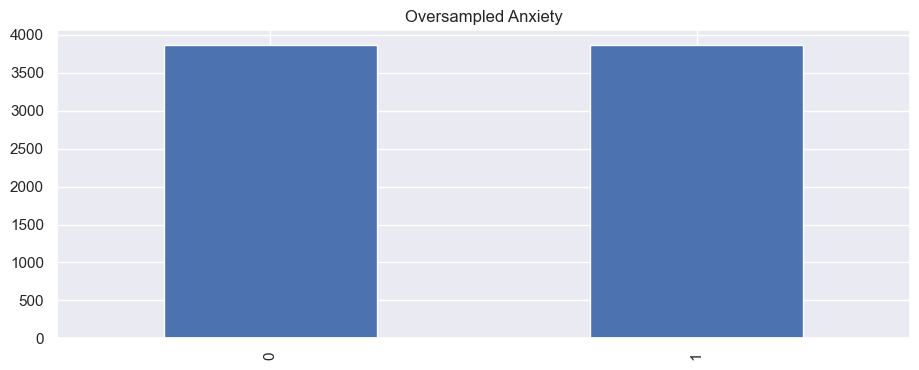

In [18]:
anxiety_os.value_counts().plot(kind='bar')
plt.title('Oversampled Anxiety')
plt.show()


# 1.  Important Features (Chi-Squares)

In [19]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

In [20]:
k = 20  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X_anxiety, anxiety_os)

In [21]:
selected_feature_indices_anx = selector.get_support(indices=True)

In [22]:
selected_feature_names_anx = X.columns[selected_feature_indices_anx]

In [23]:
chi2_scores = selector.scores_[selected_feature_indices_anx]

In [24]:
feature_importance_anx_chi2 = pd.DataFrame({'Anxiety Features': selected_feature_names_anx, 'Chi2 Score': chi2_scores})
feature_importance_anx_chi2 = feature_importance_anx_chi2.sort_values(by='Chi2 Score', ascending=False)

# Print the feature importance results
feature_importance_anx_chi2.head(20)

,Anxiety Features,Chi2 Score
0,Gender,657.925319
1,Field of study,260.469825
4,Having only one parent,240.401309
7,Grant,189.179104
2,Year of university,184.259177
15,Abnormal heart rate,177.779221
17,Drinker (3 levels),171.400929
3,Parental home,150.462053
6,Long commute,132.626054
18,Binge drinking,128.329949


# 2.  Important Features (Random Forest)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_anxiety, anxiety_os)

feature_importances_anx_RF = pd.DataFrame({'Anxiety Features': X_anxiety.columns, 'Importance': rf.feature_importances_})
feature_importances_anx_RF = feature_importances_anx_RF.sort_values(by='Importance', ascending=False)

# Print the feature importance results
print(feature_importances_anx_RF.head(20))

               Anxiety Features  Importance
1                           MAP    0.100085
2                            PP    0.099797
5                        Gender    0.069875
0                           BMI    0.067156
3              Heart rate (bpm)    0.066634
7                Field of study    0.047932
4                Age (4 levels)    0.032796
53           Drinker (3 levels)    0.031382
15                Parental home    0.030007
20       Mode of transportation    0.026679
16       Having only one parent    0.024668
22                        Grant    0.023477
19                 Long commute    0.022252
49       Vaccination up to date    0.022169
32  Physical activity(3 levels)    0.019298
18                     Siblings    0.018395
29             Eating junk food    0.018030
25    Private health insurance     0.017181
51  Cigarette smoker (5 levels)    0.016873
6            French nationality    0.016665


# 3. Important Features (ANOVA)

In [27]:
import pandas as pd
from scipy.stats import f_oneway
import numpy as np

# Perform ANOVA for all features
anova_results = {}
for feature in X_anxiety.columns:
    f_statistic, p_value = f_oneway(*[X_anxiety[anxiety_os == group][feature] for group in np.unique(anxiety_os)])
    anova_results[feature] = {'F-Statistic': f_statistic, 'P-value': p_value}

# Sort the features based on F-statistic in descending order
sorted_features = sorted(anova_results.items(), key=lambda x: x[1]['F-Statistic'], reverse=True)

# Select the top 20 features with non-NaN values
top_20_features = []
for feature, values in sorted_features:
    if not np.isnan(values['F-Statistic']) and not np.isnan(values['P-value']):
        top_20_features.append(feature)
        if len(top_20_features) == 20:
            break

# Create a dataframe to store the top 20 features and their ANOVA results
top_20_df = pd.DataFrame(columns=['Feature', 'F-Statistic', 'P-value'])
for feature in top_20_features:
    f_statistic = anova_results[feature]['F-Statistic']
    p_value = anova_results[feature]['P-value']
    top_20_df = top_20_df.append({'Feature': feature, 'F-Statistic': f_statistic, 'P-value': p_value}, ignore_index=True)

# Print the top 20 features and their corresponding F-statistic and p-value
print(top_20_df)

                             Feature  F-Statistic        P-value
0                             Gender  1042.418179  1.186229e-214
1                      Parental home   342.819974   6.356784e-75
2             Having only one parent   328.430163   6.409485e-72
3                     Field of study   298.528257   1.166123e-65
4                              Grant   255.017174   1.664721e-56
5                           Siblings   211.304067   2.985238e-47
6                       Long commute   187.560731   3.358315e-42
7          Irregular rhythm of meals   139.622433   6.055418e-32
8                 Drinker (3 levels)   395.059820   8.848199e-86
9             Vaccination up to date   252.832556   4.813222e-56
10               Abnormal heart rate   189.645015   1.207770e-42
11            Overweight and obesity   139.130418   7.723859e-32
12         Private health insurance    138.654137   9.775828e-32
13                French nationality   138.644902   9.820592e-32
14                    Bin

# MODELING With Chi Square Features

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Select the top 20 features from the 'feature_importance_Chi2' dataframe
top_20_features = feature_importance_anx_chi2.head(20)['Anxiety Features'].tolist()

# Create the feature matrix 'X' using the top 20 features
X_anx_chi2 = X_anxiety[top_20_features]

# Create the target variable 'y'
y_anx_chi2 = anxiety_os

# Split the data into training and testing sets
X_train_anx_chi2, X_test_anx_chi2, y_train_anx_chi2, y_test_anx_chi2 = train_test_split(X_anx_chi2, y_anx_chi2, test_size=0.3, random_state=42)

In [29]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded_anx_chi2 = label_encoder.fit_transform(y_train_anx_chi2)

# Transform the test set
y_test_encoded_anx_chi2 = label_encoder.transform(y_test_anx_chi2)


In [30]:
# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train_anx_chi2, y_train_encoded_anx_chi2)

RandomForestClassifier()

In [31]:
# Predict on the test data
y_pred_anx_chi2 = rf_classifier.predict(X_test_anx_chi2)

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, accuracy_score, f1_score

# Calculate AUC score
auc_score = roc_auc_score(y_test_encoded_anx_chi2, y_pred_anx_chi2)

# Calculate precision score
precision = precision_score(y_test_encoded_anx_chi2, y_pred_anx_chi2)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded_anx_chi2, y_pred_anx_chi2)

# Calculate F1 score
f1 = f1_score(y_test_encoded_anx_chi2, y_pred_anx_chi2)

# Print the results
print("AUC score for Anxiety:", auc_score)
print("Precision for Anxiety:", precision)
print("Accuracy for Anxiety:", accuracy)
print("F1 score for Anxiety:", f1)

AUC score for Anxiety: 0.8435278454714076
Precision for Anxiety: 0.822061191626409
Accuracy for Anxiety: 0.8436018957345972
F1 score for Anxiety: 0.849064449064449


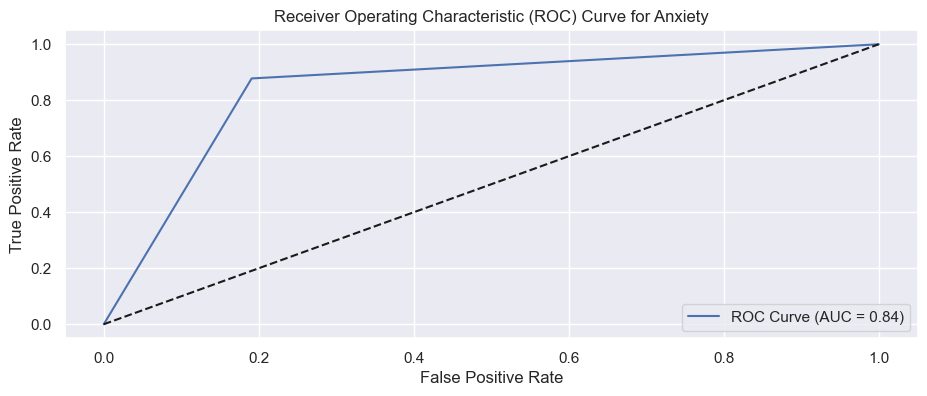

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded_anx_chi2, y_pred_anx_chi2)

# Compute the AUC score
auc_score = roc_auc_score(y_test_encoded_anx_chi2, y_pred_anx_chi2)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Add the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Anxiety')
plt.legend(loc='lower right')
plt.show()


# MODELING With RF Features

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Select the top 20 features from the 'feature_importance_Chi2' dataframe
top_20_features = feature_importances_anx_RF.head(20)['Anxiety Features'].tolist()

# Create the feature matrix 'X' using the top 20 features
X_anx_RF = X_anxiety[top_20_features]

# Create the target variable 'y'
y_anx_RF = anxiety_os

# Split the data into training and testing sets
X_train_anx_RF, X_test_anx_RF, y_train_anx_RF, y_test_anx_RF = train_test_split(X_anx_RF, y_anx_RF, test_size=0.3, random_state=42)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded_anx_RF = label_encoder.fit_transform(y_train_anx_RF)

# Transform the test set
y_test_encoded_anx_RF = label_encoder.transform(y_test_anx_RF)


In [36]:
# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train_anx_RF, y_train_encoded_anx_RF)

RandomForestClassifier()

In [37]:
# Predict on the test data
y_pred_anx_RF = rf_classifier.predict(X_test_anx_RF)

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, accuracy_score, f1_score

# Calculate AUC score
auc_score = roc_auc_score(y_test_encoded_anx_RF, y_pred_anx_RF)

# Calculate precision score
precision = precision_score(y_test_encoded_anx_RF, y_pred_anx_RF)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded_anx_RF, y_pred_anx_RF)

# Calculate F1 score
f1 = f1_score(y_test_encoded_anx_RF, y_pred_anx_RF)

# Print the results
print("AUC score for Anxiety:", auc_score)
print("Precision for Anxiety:", precision)
print("Accuracy for Anxiety:", accuracy)
print("F1 score for Anxiety:", f1)

AUC score for Anxiety: 0.9345329585061564
Precision for Anxiety: 0.9438103599648815
Accuracy for Anxiety: 0.934510986643688
F1 score for Anxiety: 0.9339704604691572


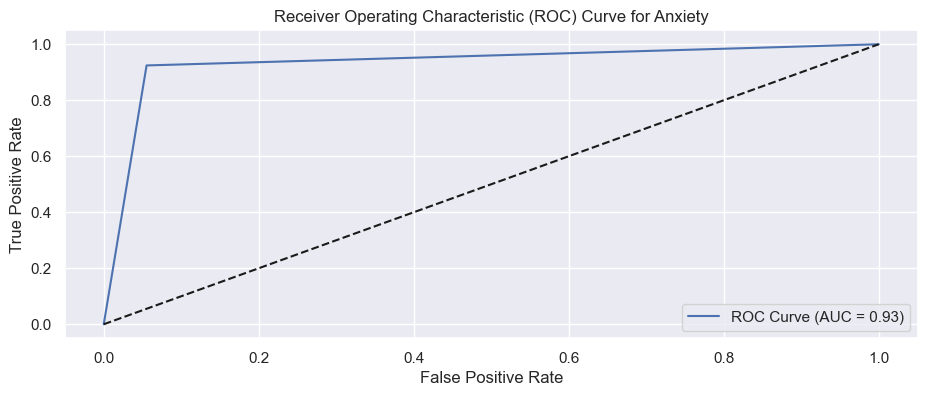

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded_anx_RF, y_pred_anx_RF)

# Compute the AUC score
auc_score = roc_auc_score(y_test_encoded_anx_RF, y_pred_anx_RF)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Add the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Anxiety')
plt.legend(loc='lower right')
plt.show()

# MODELING With ANOVA Features

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Select the top 20 features
selected_features = top_20_df['Feature'].tolist()

# Create the feature matrix X and target variable y
X = X_anxiety[selected_features]
y = anxiety_os

# Split the data into training and testing sets
X_train_anx_ANOVA, X_test_anx_ANOVA, y_train_anx_ANOVA, y_test_anx_ANOVA = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded_anx_ANOVA = label_encoder.fit_transform(y_train_anx_ANOVA)

# Transform the test set
y_test_encoded_anx_ANOVA = label_encoder.transform(y_test_anx_ANOVA)

In [42]:
# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_anx_ANOVA, y_train_encoded_anx_ANOVA)

RandomForestClassifier(random_state=42)

In [43]:
# Predict on the test data
y_pred_anx_ANOVA = rf_classifier.predict(X_test_anx_ANOVA)

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, accuracy_score, f1_score

# Calculate AUC score
auc_score = roc_auc_score(y_test_encoded_anx_ANOVA, y_pred_anx_ANOVA)

# Calculate precision score
precision = precision_score(y_test_encoded_anx_ANOVA, y_pred_anx_ANOVA)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded_anx_ANOVA, y_pred_anx_ANOVA)

# Calculate F1 score
f1 = f1_score(y_test_encoded_anx_ANOVA, y_pred_anx_ANOVA)

# Print the results
print("AUC score for Anxiety with ANOVA:", auc_score)
print("Precision for Anxiety with ANOVA:", precision)
print("Accuracy for Anxiety with ANOVA:", accuracy)
print("F1 score for Anxiety with ANOVA:", f1)

AUC score for Anxiety with ANOVA: 0.8637991793601504
Precision for Anxiety with ANOVA: 0.8474159146841673
Accuracy for Anxiety with ANOVA: 0.8638517880224041
F1 score for Anxiety with ANOVA: 0.8673383711167086


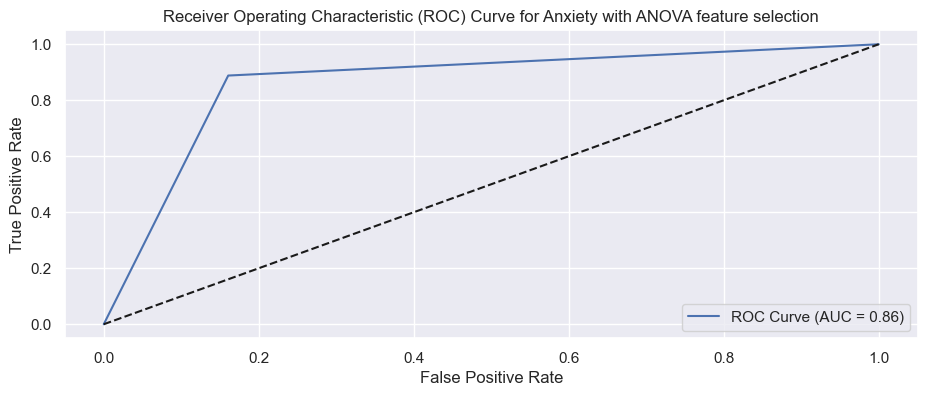

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded_anx_ANOVA, y_pred_anx_ANOVA)

# Compute the AUC score
auc_score = roc_auc_score(y_test_encoded_anx_ANOVA, y_pred_anx_ANOVA)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Add the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Anxiety with ANOVA feature selection')
plt.legend(loc='lower right')
plt.show()